In [1]:
import sklearn.neural_network as nn
import sklearn.datasets as data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
dataset = data.load_iris()

In [3]:
X = dataset.data[:,2:]
Y = dataset.target
Labels = dataset.values()

Yn = np.zeros((150,3))

In [4]:
for i in range(150):
    Yn[i,int(Y[i])] = 1

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
clf = nn.MLPClassifier(activation='relu',hidden_layer_sizes=(5,),solver = 'lbfgs',alpha = 0.1)

In [7]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
sum(clf.predict(X_train) == y_train)/y_train.shape[0]

0.9583333333333334

In [9]:
100*sum(clf.predict(X_test) == y_test)/y_test.shape[0]

96.66666666666667

In [10]:
pY = clf.predict(X)

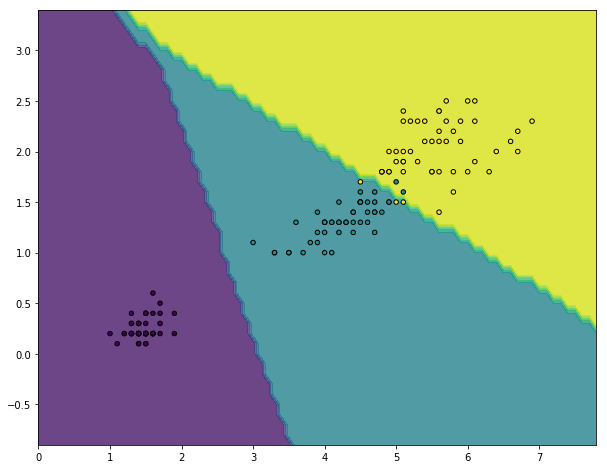

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

axarr.contourf(xx, yy, Z, alpha=0.8)
axarr.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='black')

In [12]:
100*sum(clf.predict(X) == Y)/Y.shape

array([96.])

In [13]:
X.shape

(150, 2)

In [14]:
xx.shape

(44, 79)

In [15]:
yy.shape

(44, 79)

In [16]:
np.c_[xx.ravel(), yy.ravel()].shape

(3476, 2)

In [17]:
Z.shape

(44, 79)